<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#前言" data-toc-modified-id="前言-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>前言</a></span></li></ul></div>

# 前言

K Mean为非监督聚类算法. 和KNN相似之处为都使用了近邻信息来进行标注. 主要思想为由用户指定k个初始质心作为聚类的类别, 重复迭代至算法收敛.

算法为:

选取k个初始质心:

repeat:

    对每个样本点, 计算得到其最近质心, 将其标注为该质心所在cluster, 新计算k个cluster对应的质心(平均值坐标)

until: 质心不再变化

**缺点:**
1. 局部最优, 容易受初始质心影响
1. k值选取很难

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nba = pd.read_csv("nba_2013.csv")
nba.shape


(481, 31)

/home/guohua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


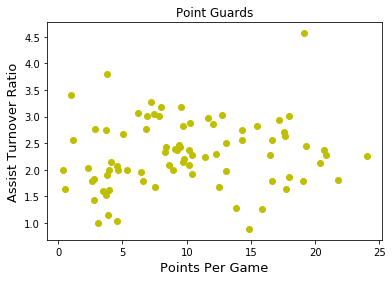

In [73]:

## 2. Point Guards ##

# Enter code here.
point_guards = nba[nba['pos'] == 'PG']

## 3<. Points Per Game ##

point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check, make sure ppg = pts/g
point_guards[['pts', 'g', 'ppg']].head(5)

## 4. Assist Turnover Ratio ##

point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

## 5. Visualizing the Point Guards ##

plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

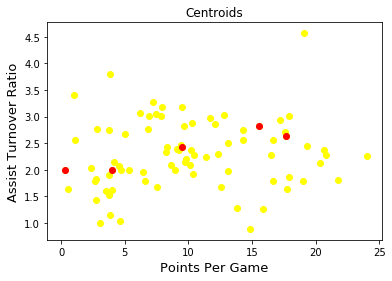

In [74]:


## 7. The Algorithm ##

num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

## 8. Visualize Centroids ##

plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()


In [75]:

def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

## 10. Step 1 (Euclidean Distance) ##

import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


In [76]:
point_guards.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end', 'ppg', 'atr'],
      dtype='object')

In [77]:
point_guards.shape

(82, 33)

In [78]:
point_guards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 24 to 471
Data columns (total 33 columns):
player          82 non-null object
pos             82 non-null object
age             82 non-null int64
bref_team_id    82 non-null object
g               82 non-null int64
gs              82 non-null int64
mp              82 non-null int64
fg              82 non-null int64
fga             82 non-null int64
fg.             82 non-null float64
x3p             82 non-null int64
x3pa            82 non-null int64
x3p.            82 non-null float64
x2p             82 non-null int64
x2pa            82 non-null int64
x2p.            82 non-null float64
efg.            82 non-null float64
ft              82 non-null int64
fta             82 non-null int64
ft.             81 non-null float64
orb             82 non-null int64
drb             82 non-null int64
trb             82 non-null int64
ast             82 non-null int64
stl             82 non-null int64
blk             82 non-null int6

In [79]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1  
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)

        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

# 生成一个新的属性cluster：存储每个节点所属的簇的键值
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

In [80]:
point_guards.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end', 'ppg', 'atr', 'cluster'],
      dtype='object')

In [81]:
# Uncomment when ready
from sklearn.metrics.pairwise import euclidean_distances

def assign_to_cluster(row):
    position = [row['ppg'], row['atr']]
#     position = [row[0][31], row[0][32]]
    distances = [euclidean_distances(position, centroids_dict[i]) for i in range(5)]
    min_distance = min(distances)
    return distances.index(min_distance)

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
    


ValueError: ('Expected 2D array, got 1D array instead:\narray=[13.09859155  2.504     ].\nReshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.', 'occurred at index 24')

In [70]:
point_guards.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end', 'ppg', 'atr'],
      dtype='object')

IndexError: ('only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices', 'occurred at index 24')

In [68]:
row1 = point_guards.iloc[1].values.reshape(1, -1)
# assign_to_cluster(row1)
type(row1[0][32])


numpy.float64

In [ ]:



## 12. Visualizing Clusters ##

# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

In [24]:
# ## 9. Setup (continued) ##


## 11. Step 1 (Continued) ##

# Add the function, `assign_to_cluster`
# This creates the column, `cluster`, by applying assign_to_cluster row-by-row


## 13. Step 2 ##

def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        # Finish the logic
        cluster_df = df[df['cluster'] == cluster_id]
        new_centroids_dict[cluster_id] = [cluster_df['ppg'].mean(axis = 0), cluster_df['atr'].mean(axis = 0)]
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

## 14. Repeat Step 1 ##

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

## 15. Repeat Step 2 and Step 1 ##

centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

## 16. Challenges of K-Means ##



ValueError: ('Expected 2D array, got 1D array instead:\narray=[13.09859155  2.504     ].\nReshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.', 'occurred at index 24')

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)

NameError: name 'visualize_clusters' is not defined